In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('car data.csv')

In [3]:
print(data.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [5]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


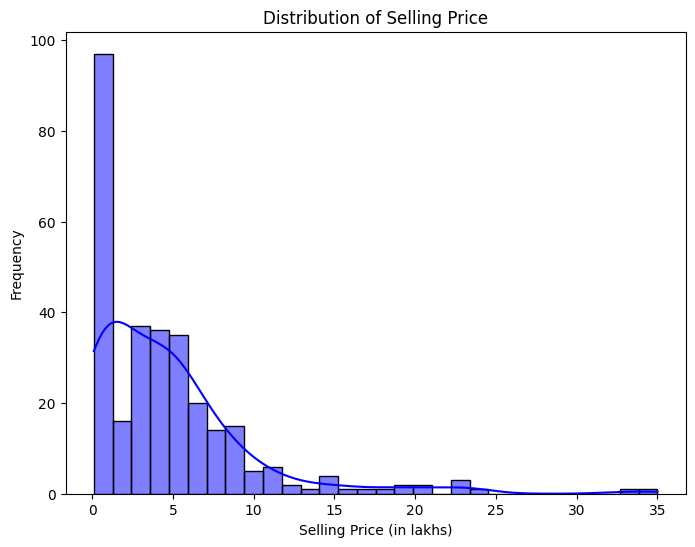

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Selling_Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

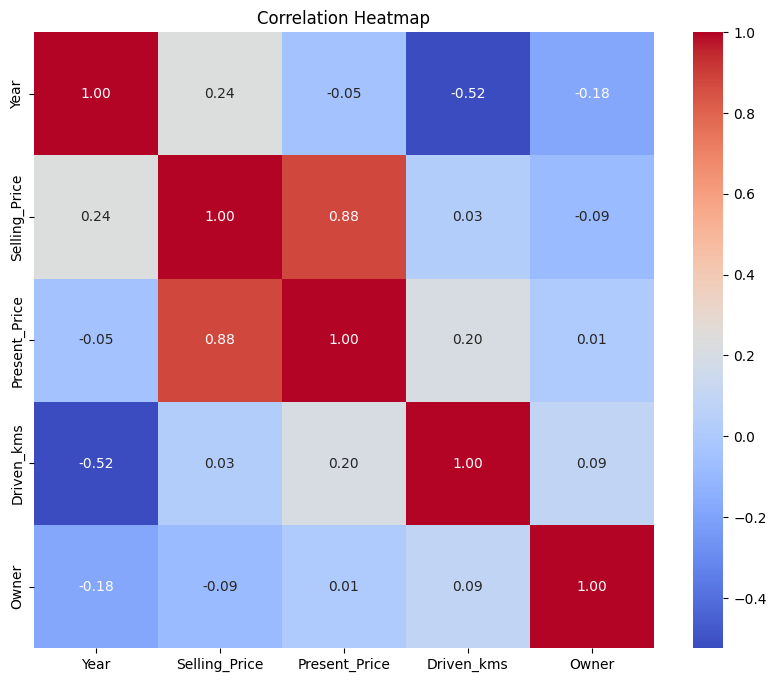

In [9]:
# Correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
 #Dropping irrelevant columns (like Car_Name) as they don't contribute to the model
data.drop(columns=['Car_Name'], inplace=True)


In [11]:
# Encoding categorical variables
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
data['Selling_type'] = data['Selling_type'].map({'Dealer': 0, 'Individual': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})


In [12]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

In [13]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print("\nTraining and Testing Data Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Training and Testing Data Shapes:
X_train: (240, 7), X_test: (61, 7)
y_train: (240,), y_test: (61,)


In [15]:
# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
# Initializing and training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)


In [18]:
# Evaluating the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")



Linear Regression Performance:
MSE: 3.53, R2 Score: 0.85


In [19]:
# Initializing and training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")


Random Forest Performance:
MSE: 0.87, R2 Score: 0.96


In [22]:
# Extracting feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns

In [23]:
# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


<ipython-input-24-e1e31c482a53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


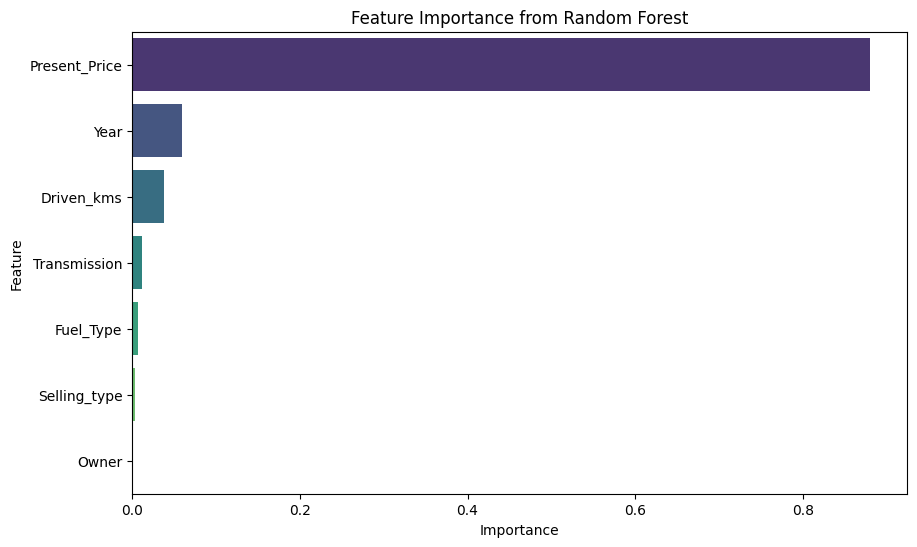

In [24]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

In [25]:
# Saving the Random Forest model as it performed better
import joblib
joblib.dump(rf_model, 'car_price_prediction_model.pkl')

print("\nModel saved successfully!")


Model saved successfully!


In [26]:
# Loading the saved model
loaded_model = joblib.load('car_price_prediction_model.pkl')

# Example input for prediction (update values as needed)
example_input = [[2015, 9.85, 20000, 1, 0, 0, 0]]  # [Year, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner]

# Making a prediction
predicted_price = loaded_model.predict(example_input)
print(f"\nPredicted Selling Price: {predicted_price[0]:.2f} lakhs")


Predicted Selling Price: 7.16 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
